In [1]:
import tensorflow as tf

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2744 - loss: 2.0201 - val_accuracy: 0.3767 - val_loss: 1.7818
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3709 - loss: 1.7724 - val_accuracy: 0.3825 - val_loss: 1.7052
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3873 - loss: 1.7187 - val_accuracy: 0.3794 - val_loss: 1.7336
313/313 - 0s - 952us/step - accuracy: 0.3794 - loss: 1.7336
custom CNNTest accuracy:0.3794


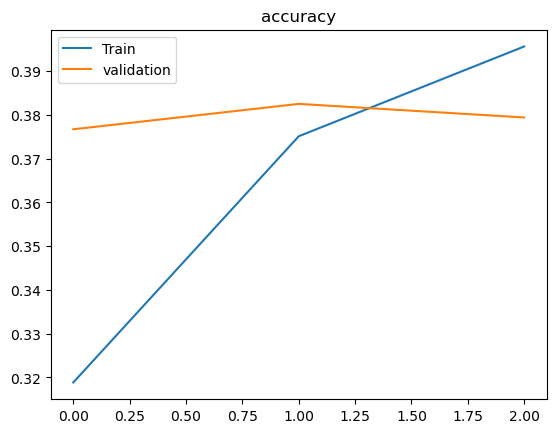

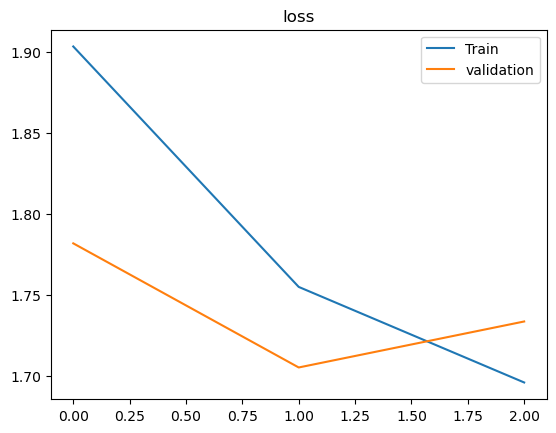

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 61ms/step - accuracy: 0.4650 - loss: 1.5294 - val_accuracy: 0.5582 - val_loss: 1.2585
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.5840 - loss: 1.1955 - val_accuracy: 0.5680 - val_loss: 1.2281
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.5990 - loss: 1.1385 - val_accuracy: 0.5844 - val_loss: 1.1777
313/313 - 16s - 52ms/step - accuracy: 0.5844 - loss: 1.1777
VGG16Test accuracy:0.5844


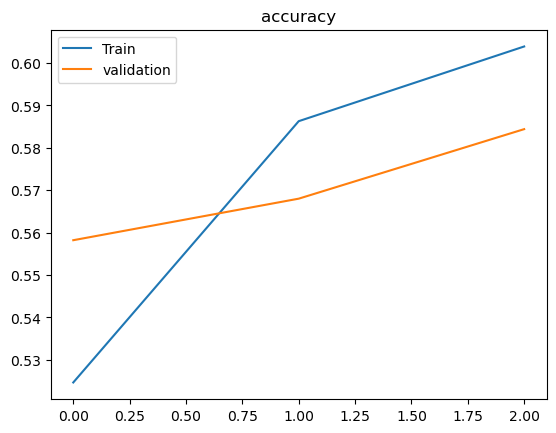

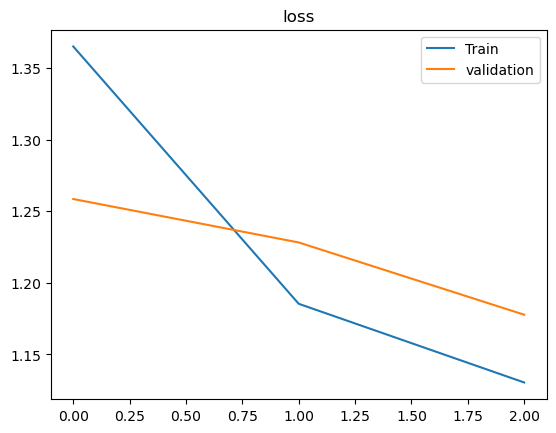

In [9]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images, train_labels),(test_images, test_labels)= cifar10.load_data()
train_images, test_images = train_images/255.0, test_images/255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

def create_model(base_model=None):
    model=models.Sequential()
    if base_model:
        model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title('accuracy')
    plt.legend()
    plt.show()
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('loss')
    plt.legend()
    plt.show()
vgg_base=VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
vgg_base.trainable=False

for model, name in[(create_model(),"custom CNN"),(create_model(vgg_base),"VGG16")]:
    history=model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))
    print(f"{name}Test accuracy:{model.evaluate(test_images, test_labels, verbose=2)[1]:.4f}")
    plot_history(history)
    